In [2]:
# Outlier Detection and Removal in Age and Fare Columns (FULLY FIXED)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = sns.load_dataset("titanic")
print("Original data shape:", df.shape)

Original data shape: (891, 15)


In [4]:
# IQR Outlier Detection Function
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

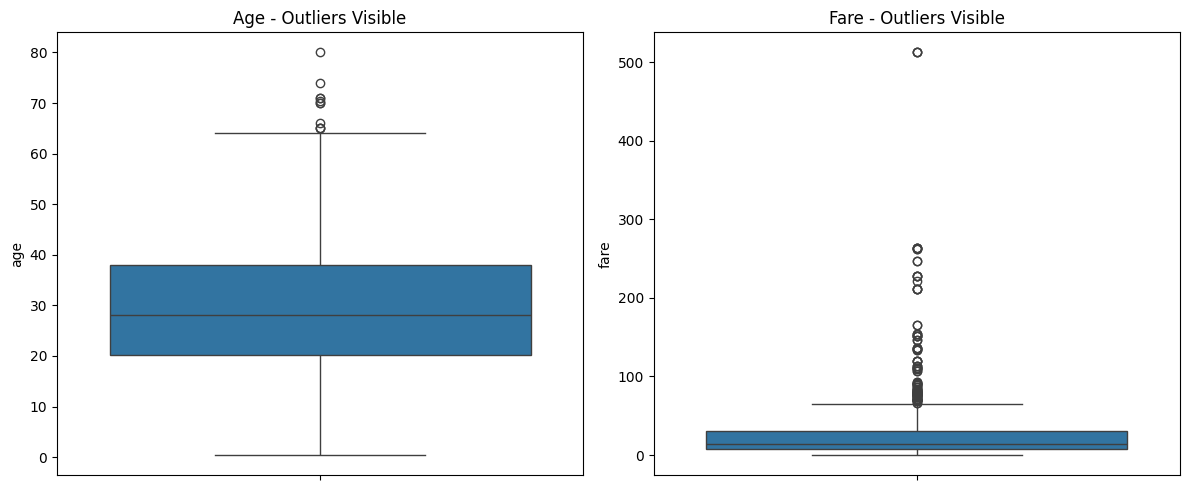

In [5]:
# VISUALIZATION 1: Boxplots (Original)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # ✅ FIXED: Complete subplots()
sns.boxplot(data=df, y='age', ax=axes[0])
axes[0].set_title('Age - Outliers Visible')
sns.boxplot(data=df, y='fare', ax=axes[1])
axes[1].set_title('Fare - Outliers Visible')
plt.tight_layout()
plt.show()

NameError: name 'age_lower' is not defined

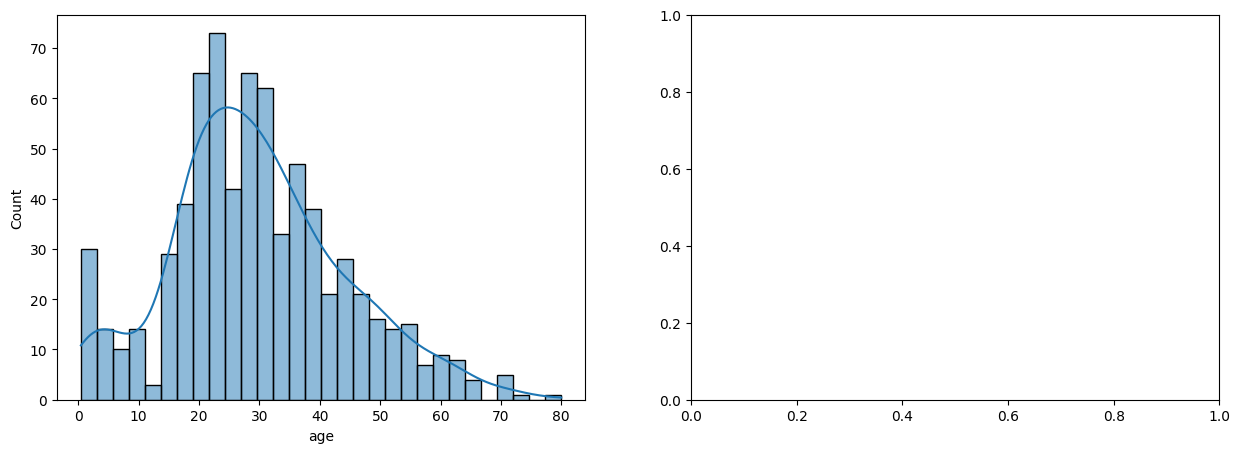

In [6]:
# VISUALIZATION 2: Distributions with IQR bounds (FIXED)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # ✅ FIXED: Complete subplots()
sns.histplot(data=df, x='age', kde=True, bins=30, ax=axes[0])
axes[0].axvline(age_lower, color='red', linestyle='--', label=f'IQR: {age_lower:.0f}-{age_upper:.0f}')
axes[0].axvline(age_upper, color='red', linestyle='--')
axes[0].set_title('Age Distribution + IQR Bounds')
axes[0].legend()

sns.histplot(data=df, x='fare', kde=True, bins=30, ax=axes[1])
axes[1].axvline(fare_lower, color='red', linestyle='--', label=f'IQR: {fare_lower:.0f}-{fare_upper:.0f}')
axes[1].axvline(fare_upper, color='red', linestyle='--')
axes[1].set_title('Fare Distribution + IQR Bounds')
axes[1].legend()
plt.tight_layout()
plt.show()


In [ ]:
# === OUTLIER HANDLING (RECOMMENDED: CAPPING) ===
df_clean = df.copy()
df_clean['age_capped'] = np.clip(df_clean['age'], age_lower, age_upper)
df_clean['fare_capped'] = np.clip(df_clean['fare'], fare_lower, fare_upper)


In [ ]:
# Stats comparison
print("\n=== STATS COMPARISON ===")
print("Age - Original:  mean=%.1f, std=%.1f" % (df['age'].mean(), df['age'].std()))
print("Age - Capped:    mean=%.1f, std=%.1f" % (df_clean['age_capped'].mean(), df_clean['age_capped'].std()))
print("Fare- Original:  mean=$%.1f, std=$%.1f" % (df['fare'].mean(), df['fare'].std()))
print("Fare- Capped:    mean=$%.1f, std=$%.1f" % (df_clean['fare_capped'].mean(), df_clean['fare_capped'].std()))



=== STATS COMPARISON ===
Age - Original:  mean=29.7, std=14.5
Age - Capped:    mean=29.6, std=14.3
Fare- Original:  mean=$32.2, std=$49.7
Fare- Capped:    mean=$24.0, std=$20.5


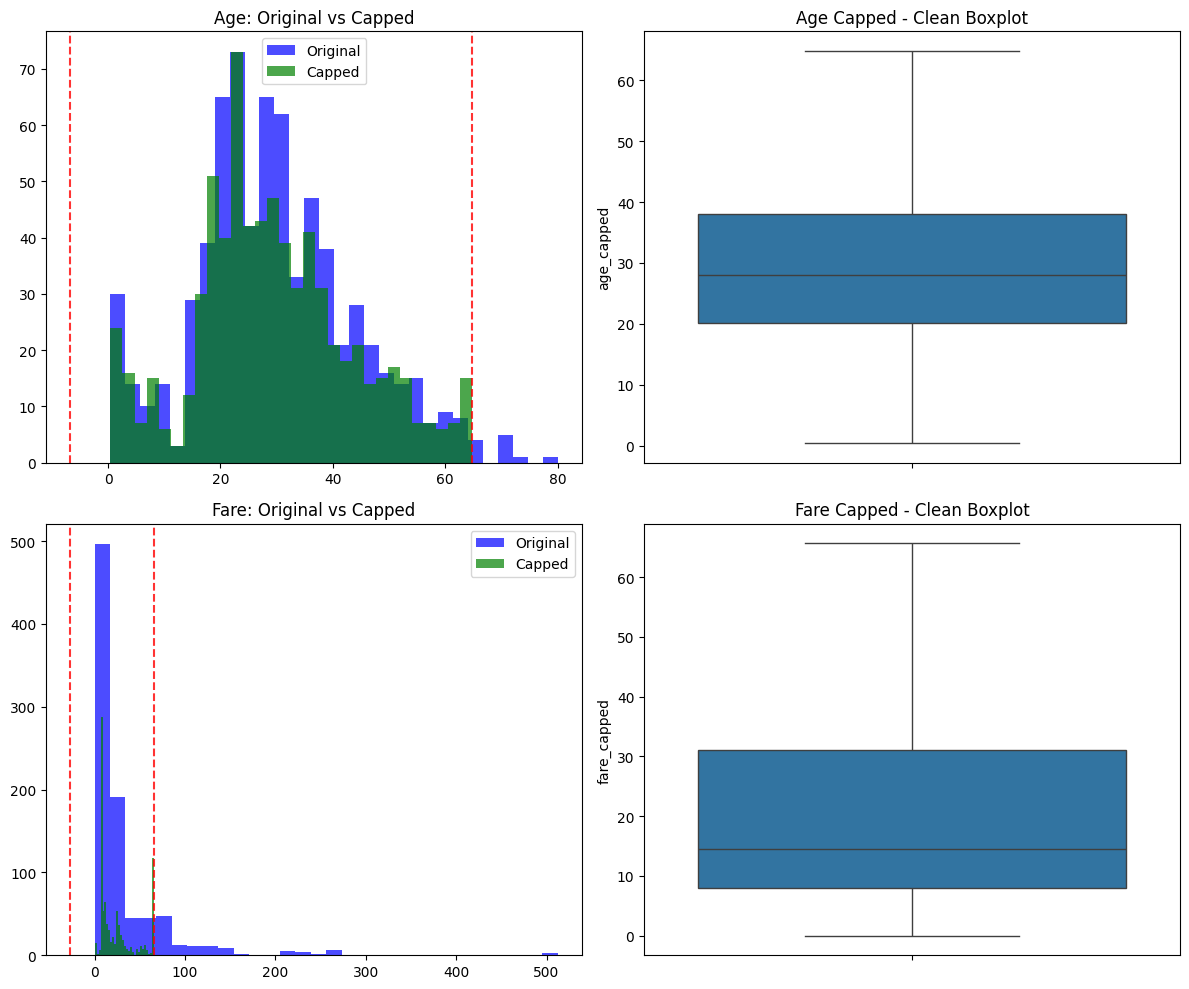


✅ SUCCESS! Use df_clean[['age_capped', 'fare_capped']] for modeling
   - No data loss
   - Controlled extremes
   - Stable statistics


In [ ]:
# FINAL VISUALIZATION: Before vs After
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].hist(df['age'].dropna(), bins=30, alpha=0.7, label='Original', color='blue')
axes[0,0].hist(df_clean['age_capped'].dropna(), bins=30, alpha=0.7, label='Capped', color='green')
axes[0,0].axvline(age_lower, color='red', linestyle='--', alpha=0.8)
axes[0,0].axvline(age_upper, color='red', linestyle='--', alpha=0.8)
axes[0,0].set_title('Age: Original vs Capped')
axes[0,0].legend()

axes[1,0].hist(df['fare'], bins=30, alpha=0.7, label='Original', color='blue')
axes[1,0].hist(df_clean['fare_capped'], bins=30, alpha=0.7, label='Capped', color='green')
axes[1,0].axvline(fare_lower, color='red', linestyle='--', alpha=0.8)
axes[1,0].axvline(fare_upper, color='red', linestyle='--', alpha=0.8)
axes[1,0].set_title('Fare: Original vs Capped')
axes[1,0].legend()

sns.boxplot(data=df_clean, y='age_capped', ax=axes[0,1])
axes[0,1].set_title('Age Capped - Clean Boxplot')

sns.boxplot(data=df_clean, y='fare_capped', ax=axes[1,1])
axes[1,1].set_title('Fare Capped - Clean Boxplot')

plt.tight_layout()
plt.show()

print("\n✅ SUCCESS! Use df_clean[['age_capped', 'fare_capped']] for modeling")
print("   - No data loss")
print("   - Controlled extremes")
print("   - Stable statistics")


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
